<a href="https://colab.research.google.com/github/ryan-richards/adminpanel/blob/master/40079400_Ryan_Richards_ICW_160921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

url = "https://canvas.qub.ac.uk/files/2052357/download?download_frd=1&verifier=7ehqWnIrFantpGEsKJn5s9p62LbmNYkfLUbV8aP5"

df = pd.read_csv(url, index_col=0)
df_t = df.T #Transposed
df_pca3D = df.T
df_knn = df_t.sample(n=500)
last_n_column  = df_t.iloc[: , -1:]
df_knn.shape



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

(500, 441)

In [ ]:
#rename last coloumn to 'Subgroup'
df_pca3D.columns = [*df_pca3D.columns[:-1], 'Subgroup']
#remove C before all subgroups
df_pca3D['Subgroup'] = df_pca3D['Subgroup'].str.replace(r'\D', '')
df_pca3D


,ACTL6A_S5,ADAM9_S2,ADAMTS1_S5,ADCY7_S3,AIMP2_S5,ALKBH7_S5,ALOX5AP_S3,AMPD3_S3,APITD1_S5,APOC1_S3,APOE_S3,APOO_S5,ARHGAP1_S2,ARHGAP15_S3,ARHGDIA_S2,ARRB2_S3,B2M_S3,BCCIP_S5,BRCA2_S5,BRIP1_S5,BSG_S2,BTK_S3,C11orf24_S5,C12orf24_S5,C13orf1_S5,C13orf18_S3,C13orf27_S5,C16orf61_S5,C19orf48_S5,C1orf54_S3,C3AR1_S3,C3orf26_S5,CASP1_S3,CBX1_S5,CCBL2_S5,CCL2_S3,CCL5_S3,CCRL2_S3,CCT5_S5,CD14_S4,...,TIMP1_S2,TLR2_S3,TMEM130_S5,TNC_S2,TNFAIP3_S3,TNFRSF12A_S5,TNFRSF1A_S2,TNFRSF1B_S3,TNFSF13B_S3,TOMM40_S5,TPI1_S5,TPM1_S5,TPM2_S5,TPM3_S5,TPRKB_S5,TRA2B_S5,TUBA4A_S5,TUBG1_S5,UAP1_S5,UBE2J1_S5,UMPS_S5,UQCR10_S5,USPL1_S5,VCAN_S2,VDAC1_S5,VSIG4_S3,VTA1_S5,WDHD1_S5,WDR54_S5,WDR77_S5,WIPF1_S3,WNT2B_S2,WNT8B_S2,WSB2_S5,ZWILCH_S5,ZYX_S2,MMP3_S2,PLG_S5,RGS8_S5,Subgroup
TCGA.02.0047.GBM.C4,745.567,4287.78,241.556,1067.64,406.736,518.148,1326.41,326.992,184.308,1370.66,32631,374.935,2296.94,153.047,9756.29,1828.57,38492.3,1115.47,73.143,94.6556,8056.79,264.913,749.869,184.394,389.072,235.41,115.554,310.618,448.078,181.321,743.108,370.017,365.1,3083.07,426.405,796.583,53.4743,79.9041,3068.93,2981.65,...,6594.55,637.389,391.53,21381.7,519.377,932.42,2973.05,2026.49,195.458,625.096,8048.19,1765.56,738.191,4622.15,196.687,2134.67,716.064,628.784,548.265,1514.49,440.087,1450.57,591.29,6070.87,4519.5,2142.04,1230.52,107.563,321.46,925.044,2154.95,43.0253,0,4291.47,260.211,3867.97,0,0,46.7132,4
TCGA.02.0055.GBM.C4,1154.31,9475.54,6098.95,556.132,537.088,942.957,4211.35,361.598,319.535,3093.48,22377.6,558.935,2491.94,214.156,7079.47,2284.51,119431,1175.04,78.4863,43.7281,19168.6,339.173,1437.98,352.067,380.098,311.142,220.322,670.57,594.254,335.809,1624.11,630.133,657.043,1374.07,825.9,5067.41,270.217,113.245,5411.07,9283.81,...,53376.9,1479.47,280.869,23836.9,5483.39,4002.8,4469.24,2664.05,202.383,952.488,12787.7,10880.5,15687.2,9090.96,380.098,2354.59,1328.66,831.394,3715.77,2008.13,465.873,2283.95,420.462,6849.05,4844.29,6994.25,1183.46,162.579,585.844,931.184,1947.58,44.8493,0,2494.18,467.56,11481.4,182.761,0,0.5606,4
TCGA.02.2483.GBM.C4,1498.68,2307.12,433.984,497.309,752.148,656.042,566.543,196.728,311.443,3504.38,20453.4,390.501,2451.93,95.8311,7478.63,2240.42,43296.3,1024.85,76.8338,139.314,17766.8,168.443,694.881,537.414,253.72,97.0976,570.343,676.682,2125.17,416.253,607.916,1030.5,219.103,3938.36,712.722,188.285,105.963,106.807,5820.37,4589.76,...,3798.63,427.23,97.5198,6053.83,233.457,591.873,1442.11,1266.49,67.124,1630.4,12301.8,1397.19,663.641,5677.68,695.726,4739.21,120.739,1193.88,951.979,1922.96,737.52,1713.56,401.9,2441.79,3313.98,2166.97,1514.3,267.23,561.055,1370.77,1042.74,10.1319,0.8443,4128.76,682.242,5066.81,6.3325,0,4.2216,4
TCGA.02.2485.GBM.C4,1320,2685.71,911.905,316.667,785.552,953.809,307.143,80,260.462,2482.86,25919.5,411.429,2808.57,91.4286,5357.14,1145.71,45077.6,628.324,210,126.667,18674.8,124.286,541.429,277.143,320.476,393.333,200.476,392.4,904.286,259.048,405.714,506.667,326.19,2923.33,292.01,1108.57,168.571,87.1429,4263.81,1143.81,...,3359.52,220.952,185.238,7589.05,478.095,971.429,1837.14,529.524,79.5238,1202.38,4717.62,1450.87,452.857,3382.86,359.048,3341.43,229.524,914.286,443.81,1533.81,533.333,1466.67,597.619,6409.05,2758.57,361.905,1577.62,309.524,422.381,811.905,849.524,18.5714,0.9524,3609.52,440.386,5090.95,2.381,0,18.0952,4
TCGA.02.2486.GBM.C4,1404.27,2843.9,321.951,637.805,792.963,815.244,5671.95,542.683,494.488,12512.8,67605.5,540.244,2457.93,234.146,7302.44,2794.51,142230,1010.76,43.2927,5.4878,11197.6,812.805,734.146,357.927,445.122,304.268,239.024,382.683,695.122,549.39,2437.2,774.39,1095.12,2808.54,931.165,13665.9,406.707,214.024,3497.56,6218.9,...,13066.5,1291.46,6.7073,20281.1,748.78,2162.8,4755.49,2845.12,446.951,715.854,17139.6,3096.27,1984.76,7065.85,552.439,2180.49,440.854,894.512,1076.22,1653.66,557.927,1667.68,660.976,3309.15,5523.17,12450.6,1484.76,45.7317,669.512,954.878,2454.88,7.3171,0.6098,2747.56,166.689,7800,3.6585,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
#remove last column from the df_t instance of the data.
df_t = df_t.iloc[: , :-1]
df_t

,ACTL6A_S5,ADAM9_S2,ADAMTS1_S5,ADCY7_S3,AIMP2_S5,ALKBH7_S5,ALOX5AP_S3,AMPD3_S3,APITD1_S5,APOC1_S3,APOE_S3,APOO_S5,ARHGAP1_S2,ARHGAP15_S3,ARHGDIA_S2,ARRB2_S3,B2M_S3,BCCIP_S5,BRCA2_S5,BRIP1_S5,BSG_S2,BTK_S3,C11orf24_S5,C12orf24_S5,C13orf1_S5,C13orf18_S3,C13orf27_S5,C16orf61_S5,C19orf48_S5,C1orf54_S3,C3AR1_S3,C3orf26_S5,CASP1_S3,CBX1_S5,CCBL2_S5,CCL2_S3,CCL5_S3,CCRL2_S3,CCT5_S5,CD14_S4,...,THBS2_S2,TIMP1_S2,TLR2_S3,TMEM130_S5,TNC_S2,TNFAIP3_S3,TNFRSF12A_S5,TNFRSF1A_S2,TNFRSF1B_S3,TNFSF13B_S3,TOMM40_S5,TPI1_S5,TPM1_S5,TPM2_S5,TPM3_S5,TPRKB_S5,TRA2B_S5,TUBA4A_S5,TUBG1_S5,UAP1_S5,UBE2J1_S5,UMPS_S5,UQCR10_S5,USPL1_S5,VCAN_S2,VDAC1_S5,VSIG4_S3,VTA1_S5,WDHD1_S5,WDR54_S5,WDR77_S5,WIPF1_S3,WNT2B_S2,WNT8B_S2,WSB2_S5,ZWILCH_S5,ZYX_S2,MMP3_S2,PLG_S5,RGS8_S5
TCGA.02.0047.GBM.C4,745.567,4287.78,241.556,1067.64,406.736,518.148,1326.41,326.992,184.308,1370.66,32631,374.935,2296.94,153.047,9756.29,1828.57,38492.3,1115.47,73.143,94.6556,8056.79,264.913,749.869,184.394,389.072,235.41,115.554,310.618,448.078,181.321,743.108,370.017,365.1,3083.07,426.405,796.583,53.4743,79.9041,3068.93,2981.65,...,3747.5,6594.55,637.389,391.53,21381.7,519.377,932.42,2973.05,2026.49,195.458,625.096,8048.19,1765.56,738.191,4622.15,196.687,2134.67,716.064,628.784,548.265,1514.49,440.087,1450.57,591.29,6070.87,4519.5,2142.04,1230.52,107.563,321.46,925.044,2154.95,43.0253,0,4291.47,260.211,3867.97,0,0,46.7132
TCGA.02.0055.GBM.C4,1154.31,9475.54,6098.95,556.132,537.088,942.957,4211.35,361.598,319.535,3093.48,22377.6,558.935,2491.94,214.156,7079.47,2284.51,119431,1175.04,78.4863,43.7281,19168.6,339.173,1437.98,352.067,380.098,311.142,220.322,670.57,594.254,335.809,1624.11,630.133,657.043,1374.07,825.9,5067.41,270.217,113.245,5411.07,9283.81,...,9497.97,53376.9,1479.47,280.869,23836.9,5483.39,4002.8,4469.24,2664.05,202.383,952.488,12787.7,10880.5,15687.2,9090.96,380.098,2354.59,1328.66,831.394,3715.77,2008.13,465.873,2283.95,420.462,6849.05,4844.29,6994.25,1183.46,162.579,585.844,931.184,1947.58,44.8493,0,2494.18,467.56,11481.4,182.761,0,0.5606
TCGA.02.2483.GBM.C4,1498.68,2307.12,433.984,497.309,752.148,656.042,566.543,196.728,311.443,3504.38,20453.4,390.501,2451.93,95.8311,7478.63,2240.42,43296.3,1024.85,76.8338,139.314,17766.8,168.443,694.881,537.414,253.72,97.0976,570.343,676.682,2125.17,416.253,607.916,1030.5,219.103,3938.36,712.722,188.285,105.963,106.807,5820.37,4589.76,...,386.28,3798.63,427.23,97.5198,6053.83,233.457,591.873,1442.11,1266.49,67.124,1630.4,12301.8,1397.19,663.641,5677.68,695.726,4739.21,120.739,1193.88,951.979,1922.96,737.52,1713.56,401.9,2441.79,3313.98,2166.97,1514.3,267.23,561.055,1370.77,1042.74,10.1319,0.8443,4128.76,682.242,5066.81,6.3325,0,4.2216
TCGA.02.2485.GBM.C4,1320,2685.71,911.905,316.667,785.552,953.809,307.143,80,260.462,2482.86,25919.5,411.429,2808.57,91.4286,5357.14,1145.71,45077.6,628.324,210,126.667,18674.8,124.286,541.429,277.143,320.476,393.333,200.476,392.4,904.286,259.048,405.714,506.667,326.19,2923.33,292.01,1108.57,168.571,87.1429,4263.81,1143.81,...,915.238,3359.52,220.952,185.238,7589.05,478.095,971.429,1837.14,529.524,79.5238,1202.38,4717.62,1450.87,452.857,3382.86,359.048,3341.43,229.524,914.286,443.81,1533.81,533.333,1466.67,597.619,6409.05,2758.57,361.905,1577.62,309.524,422.381,811.905,849.524,18.5714,0.9524,3609.52,440.386,5090.95,2.381,0,18.0952
TCGA.02.2486.GBM.C4,1404.27,2843.9,321.951,637.805,792.963,815.244,5671.95,542.683,494.488,12512.8,67605.5,540.244,2457.93,234.146,7302.44,2794.51,142230,1010.76,43.2927,5.4878,11197.6,812.805,734.146,357.927,445.122,304.268,239.024,382.683,695.122,549.39,2437.2,774.39,1095.12,2808.54,931.165,13665.9,406.707,214.024,3497.56,6218.9,...,1895.12,13066.5,1291.46,6.7073,20281.1,748.78,2162.8,4755.49,2845.12,446.951,715.854,17139.6,3096.27,1984.76,7065.85,552.439,2180.49,440.854,894.512,1076.22,1653.66,557.927,1667.68,660.976,3309.15,5523.17,12450.6,1484.76,45.7317,669.512,954.878,2454.88,7.3171,0.6098,2747.56,166.689,7800,3.6585,0,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#before scaling save the last column as colour category.
df_pca3D['Subgroup']=pd.Categorical(df_pca3D['Subgroup'])
my_color=df_pca3D['Subgroup'].cat.codes
#drop the last column
df_pca3D = df_pca3D.drop('Subgroup', 1)

df_rescaled = scaler.fit_transform(df_pca3D)

TCGA.02.0047.GBM.C4     3
TCGA.02.0055.GBM.C4     3
TCGA.02.2483.GBM.C4     3
TCGA.02.2485.GBM.C4     3
TCGA.02.2486.GBM.C4     3
                       ..
TCGA.ZS.A9CE.LIHC.C4    3
TCGA.ZS.A9CF.LIHC.C4    3
TCGA.ZS.A9CG.LIHC.C3    2
TCGA.ZU.A8S4.CHOL.C1    0
TCGA.ZX.AA5X.CESC.C2    1
Length: 9126, dtype: int8


In [ ]:
# Convert arrary to dataframe
df_rescaled = pd.DataFrame(df_rescaled)
df_rescaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
0,0.047910,0.089699,0.005504,0.081712,0.116779,0.030336,0.140844,0.046277,0.086245,0.001017,0.020410,0.083971,0.058481,0.065980,0.150224,0.213853,0.117014,0.077317,0.010026,0.043617,0.022258,0.053827,0.033067,0.061434,0.194996,0.025318,0.047282,0.039648,0.009405,0.044342,0.150817,0.072199,0.041355,0.087532,0.160567,0.015319,0.000680,0.014019,0.044633,0.036027,...,0.039801,0.019748,0.076450,0.007107,0.067695,0.011885,0.039195,0.191631,0.133745,0.041120,0.018280,0.059346,0.007195,0.003591,0.071957,0.046058,0.158171,0.007935,0.082119,0.023631,0.064942,0.105089,0.054228,0.221276,0.057386,0.205313,0.079997,0.156865,0.014127,0.039781,0.091145,0.192560,0.006652,0.000360,0.288763,0.043821,0.084446,0.000004,0.000005,0.113217
1,0.075010,0.199093,0.147081,0.041974,0.155079,0.055416,0.447317,0.051246,0.156189,0.002298,0.013995,0.125253,0.064009,0.092262,0.108101,0.269594,0.380110,0.082241,0.010758,0.020150,0.057281,0.068916,0.066631,0.117296,0.190454,0.033462,0.090500,0.097749,0.012568,0.082640,0.329865,0.123779,0.074827,0.036987,0.330272,0.097691,0.003470,0.019904,0.093882,0.112753,...,0.100874,0.160492,0.177839,0.005098,0.075468,0.125475,0.168895,0.292647,0.176552,0.042575,0.028187,0.102736,0.048293,0.079107,0.155735,0.097434,0.177896,0.014836,0.111828,0.184940,0.086110,0.112828,0.091801,0.157290,0.064744,0.222109,0.261207,0.150866,0.021659,0.072561,0.091873,0.173787,0.006934,0.000360,0.160543,0.081627,0.256888,0.002809,0.000005,0.001359
2,0.097843,0.047933,0.010155,0.037404,0.218269,0.038477,0.060122,0.027574,0.152004,0.002604,0.012791,0.087463,0.062875,0.041373,0.114382,0.264204,0.132629,0.069826,0.010532,0.064196,0.052863,0.034226,0.030385,0.179047,0.126488,0.010443,0.234887,0.098736,0.045693,0.102583,0.123342,0.203171,0.024616,0.112828,0.282194,0.003587,0.001356,0.018768,0.102488,0.055605,...,0.004103,0.011336,0.051146,0.001770,0.019166,0.005342,0.024810,0.088269,0.082717,0.014139,0.048699,0.098288,0.005534,0.003214,0.091745,0.185846,0.391776,0.001229,0.164979,0.044191,0.082458,0.194356,0.066085,0.150337,0.023069,0.142969,0.080929,0.193041,0.035985,0.069488,0.143997,0.091870,0.001567,0.001183,0.277155,0.120769,0.111599,0.000101,0.000005,0.010232
3,0.085996,0.055916,0.021707,0.023370,0.228084,0.056057,0.032565,0.010814,0.125635,0.001844,0.016211,0.092158,0.072984,0.039479,0.080998,0.130369,0.138420,0.037049,0.028785,0.058368,0.055725,0.025253,0.022899,0.092334,0.160276,0.042302,0.082313,0.052849,0.019276,0.063611,0.082248,0.099296,0.036894,0.082808,0.103477,0.021336,0.002162,0.015297,0.069758,0.013651,...,0.009720,0.010015,0.026310,0.003363,0.024027,0.010940,0.040843,0.114939,0.033235,0.016746,0.035748,0.028855,0.005776,0.002149,0.048723,0.091538,0.266407,0.002454,0.123982,0.018312,0.065771,0.133074,0.054954,0.223646,0.060584,0.114245,0.013517,0.201113,0.041775,0.052294,0.077729,0.074378,0.002871,0.001288,0.240112,0.076672,0.112146,0.000040,0.000005,0.043857
4,0.091583,0.059252,0.007447,0.048319,0.230262,0.047876,0.602479,0.077246,0.246681,0.009301,0.042294,0.121059,0.063045,0.100860,0.111610,0.331944,0.454220,0.068661,0.005934,0.002529,0.032157,0.165152,0.032300,0.119249,0.223365,0.032723,0.098215,0.051280,0.014750,0.135588,0.495110,0.152385,0.125054,0.079413,0.374988,0.263532,0.005227,0.037694,0.053646,0.075439,...,0.020127,0.039218,0.155202,0.000122,0.064210,0.017134,0.091169,0.311974,0.188710,0.093993,0.021027,0.142578,0.013195,0.009888,0.117769,0.145709,0.162280,0.004835,0.121083,0.050518,0.070910,0.140455,0.064017,0.247377,0.031271,0.257218,0.464978,0.189275,0.005662,0.082935,0.094682,0.219714,0.001131,0.000954,0.178619,0.026769,0.173505,0.000060,0.000005,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df_pca = PCA()
df_pca.fit(df_rescaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
df_pca.explained_variance_ratio_

array([1.30297841e-01, 1.08113924e-01, 5.33612724e-02, 4.24033022e-02,
       3.28908460e-02, 2.85062969e-02, 2.60922797e-02, 2.07682179e-02,
       1.99926058e-02, 1.84120200e-02, 1.65401555e-02, 1.63154262e-02,
       1.43293192e-02, 1.24074247e-02, 1.19101427e-02, 1.10303984e-02,
       1.00726371e-02, 9.23299038e-03, 8.88981286e-03, 8.29406879e-03,
       7.79991516e-03, 7.37205842e-03, 7.13702620e-03, 6.60365852e-03,
       6.15858616e-03, 5.88944323e-03, 5.74437829e-03, 5.62670153e-03,
       5.55901024e-03, 5.06697825e-03, 5.00096678e-03, 4.77465223e-03,
       4.63241471e-03, 4.47938116e-03, 4.29442532e-03, 4.18293156e-03,
       4.11298048e-03, 4.08276607e-03, 3.88741014e-03, 3.86758319e-03,
       3.62691060e-03, 3.56135712e-03, 3.46468669e-03, 3.43680639e-03,
       3.39726628e-03, 3.37028116e-03, 3.28891472e-03, 3.20146784e-03,
       3.11591922e-03, 3.02748430e-03, 2.91584623e-03, 2.90810562e-03,
       2.82115066e-03, 2.76590671e-03, 2.71895578e-03, 2.69734651e-03,
      

<Figure size 1000x1000 with 0 Axes>

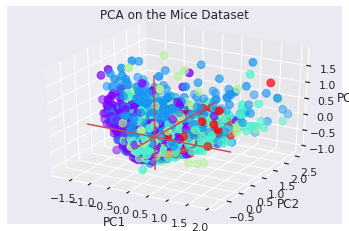

In [ ]:
# create figure
my_dpi=300
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)


# Run The PCA
pca = PCA(n_components=3)
pca.fit(df_rescaled)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df_rescaled), columns=['PCA%i' % i for i in range(3)], index=df_rescaled.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="rainbow", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the Mice Dataset")
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

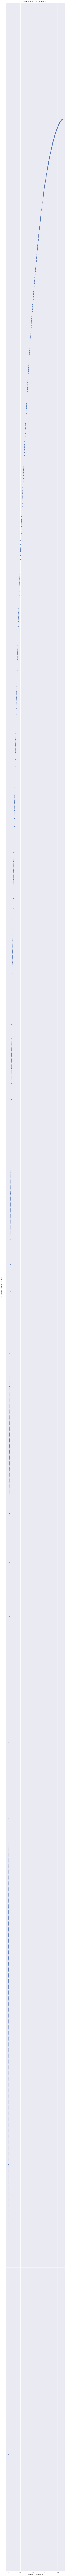

In [ ]:
plt.figure(figsize = (10,441))
plt.plot(range(1,441), df_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components ...')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

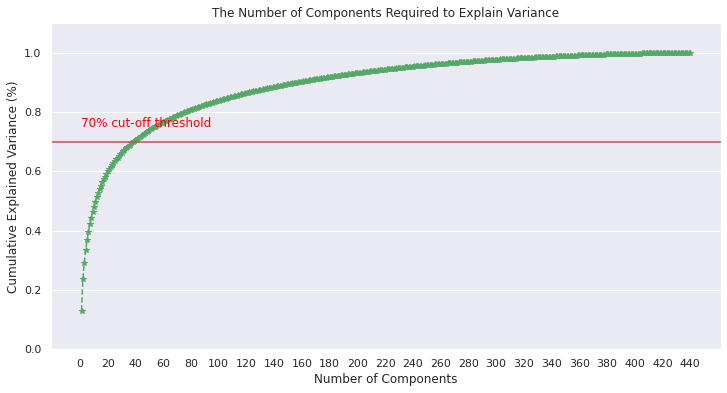

In [ ]:
pca = df_pca.fit(df_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 441, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='*', linestyle='--', color='g')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 441, step=20))
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('The Number of Components Required to Explain Variance')

plt.axhline(y=0.70, color='r', linestyle='-')
#70% variance minimum
plt.text(0.5, 0.75, '70% cut-off threshold', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

In [ ]:
df_pca_components = df_pca.explained_variance_ratio_.cumsum() >= 0.70 
Number_of_components_based_on_CEV_percentage = 440 - df_pca_components.sum()
# display number of components
Number_of_components_based_on_CEV_percentage
#min number of components = 38

38

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = Number_of_components_based_on_CEV_percentage)
pca.fit(df_rescaled)
score_pca = pca.fit_transform(df_rescaled)

In [ ]:
#Clustering K-means
wcss_pca = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 1024)
    kmeans_pca.fit(score_pca)
    wcss_pca.append(kmeans_pca.inertia_)

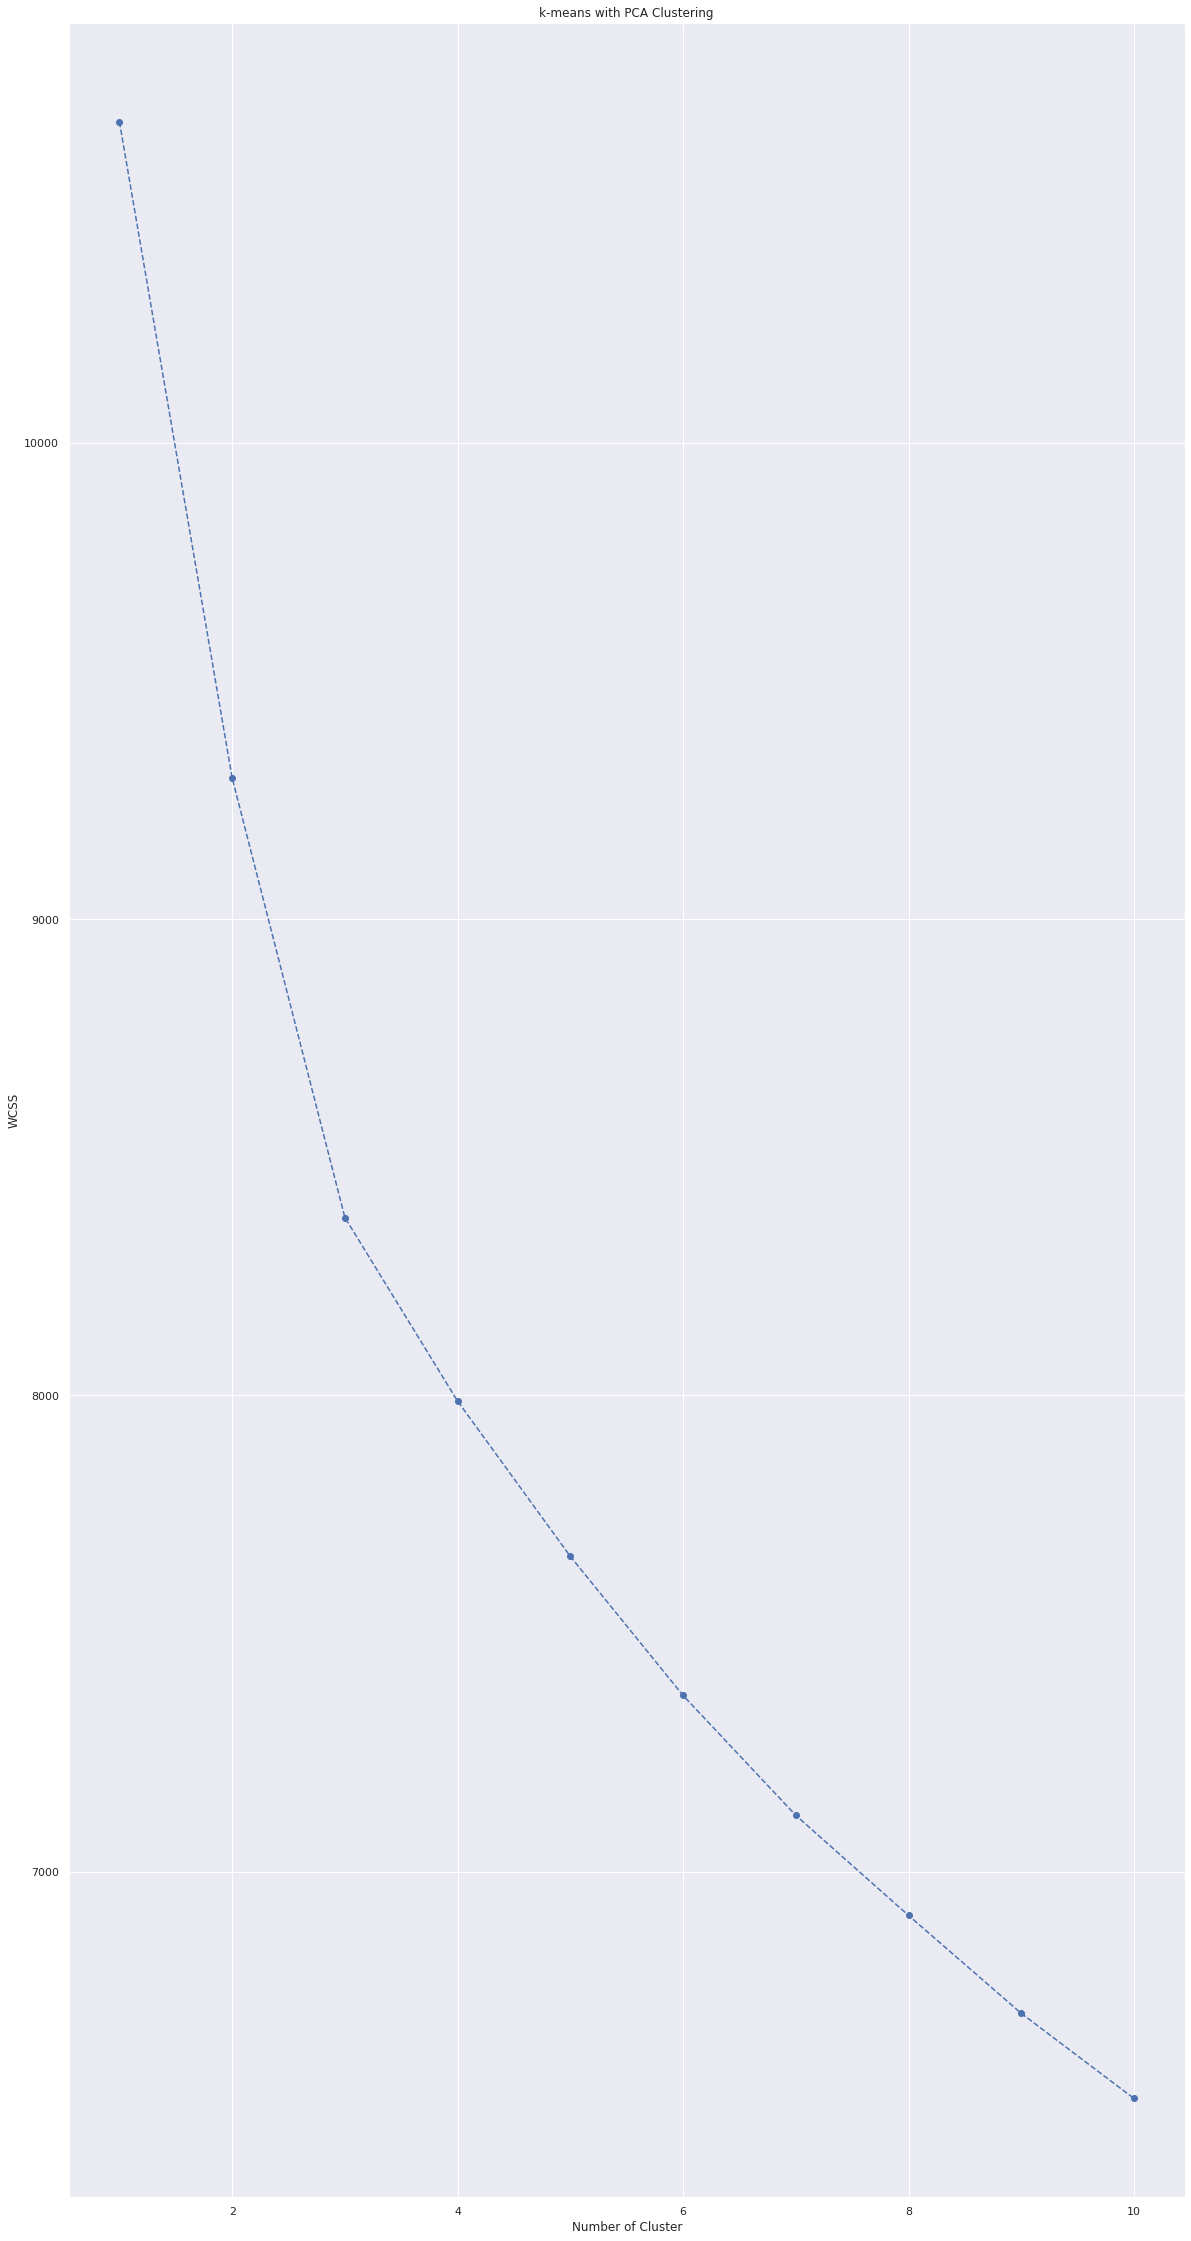

In [ ]:
#Figure plot of K-means
plt.figure(figsize = (20,Number_of_components_based_on_CEV_percentage + 2))
plt.plot(range(1,11), wcss_pca, marker = 'o', linestyle = '--')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('k-means with PCA Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1024)
cluster_labels = kmeans.fit_predict(score_pca) 

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(df_t, cluster_labels)
print("For n_clusters = 3, the average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(score_pca, cluster_labels)
print(sample_silhouette_values)

For n_clusters = 3, the average silhouette_score is : -0.01707745200022078
[-0.03923831  0.19047945  0.06926831 ...  0.19964965  0.01800866
  0.00992177]


In [ ]:
#Try with 3 clusters on scaled data
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 50)
cluster_labels_rescaled = kmeans.fit_predict(df_rescaled)

In [ ]:
# The silhouette_score gives the average value for all the samples.
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(df_rescaled, cluster_labels_rescaled)
print("For n_clusters = 3, the average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(df_rescaled, cluster_labels_rescaled)

For n_clusters = 3, the average silhouette_score is : 0.08882322363353508


In [ ]:
#Classification model using K-nearest neighbours (KNN) model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics

df_knn.columns = [*df_knn.columns[:-1], 'Subgroup']

X = df_knn.drop('Subgroup', axis=1)
y = df_knn['Subgroup']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [ ]:
train_score = []
test_score = []
k_vals = []
scores = []

for k in range(1,200):
  k_vals.append(k)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)

  tr_score =  knn.score(X_train, y_train)
  train_score.append(tr_score)

  te_score =  knn.score(X_test, y_test)
  test_score.append(te_score)

  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))

  #print(train_score)
  #print(test_score)


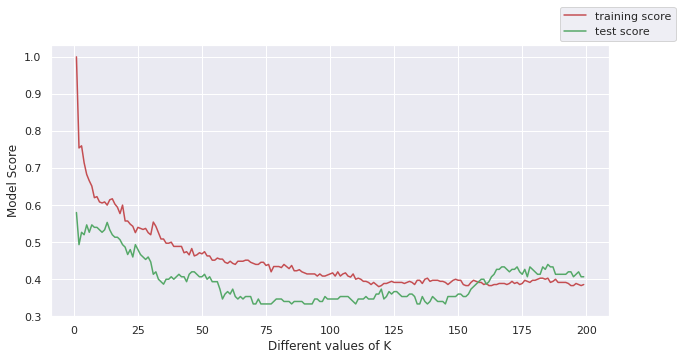

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Different values of K')
plt.ylabel('Model Score')
plt.plot(k_vals, train_score, color='r', label = "training score")
plt.plot(k_vals, test_score, color='g', label = "test score")
plt.legend(bbox_to_anchor=(1,1,),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
#SVM with df_knn smaple of 500 records

df_knn.columns = [*df_knn.columns[:-1], 'Subgroup']

X = df_knn.drop('Subgroup', axis=1)
y = df_knn['Subgroup']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20  3  3  1  0  1]
 [ 4 21  1  1  0  0]
 [ 1  2 24  2  0  0]
 [ 2  2  0  1  1  0]
 [ 0  0  0  0  8  0]
 [ 0  0  2  0  0  0]]
              precision    recall  f1-score   support

          C1       0.74      0.71      0.73        28
          C2       0.75      0.78      0.76        27
          C3       0.80      0.83      0.81        29
          C4       0.20      0.17      0.18         6
          C5       0.89      1.00      0.94         8
          C6       0.00      0.00      0.00         2

    accuracy                           0.74       100
   macro avg       0.56      0.58      0.57       100
weighted avg       0.73      0.74      0.73       100



In [ ]:
#SVM classifier model with a radial basis function (RBF) kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[23  3  2  0  0  0]
 [ 6 18  3  0  0  0]
 [ 3  3 19  4  0  0]
 [ 2  0  1  2  1  0]
 [ 0  0  1  0  7  0]
 [ 1  0  0  1  0  0]]
              precision    recall  f1-score   support

          C1       0.66      0.82      0.73        28
          C2       0.75      0.67      0.71        27
          C3       0.73      0.66      0.69        29
          C4       0.29      0.33      0.31         6
          C5       0.88      0.88      0.88         8
          C6       0.00      0.00      0.00         2

    accuracy                           0.69       100
   macro avg       0.55      0.56      0.55       100
weighted avg       0.69      0.69      0.68       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
